In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply 
%matplotlib inline

In [80]:
import os
path = os.getcwd() + '/data/house_univar.csv'
data = pd.read_csv(path)
data.head()

,Size,Price
0,502.69,6.3
1,503.65,6.3
2,505.46,6.5
3,505.94,6.5
4,507.02,6.6


In [81]:
data.describe()

,Size,Price
count,97.000000,97.000000
mean,815.980000,19.908247
std,386.988353,17.767208
min,502.690000,6.300000
25%,570.770000,9.300000
50%,658.940000,12.700000
75%,857.810000,20.900000
max,2220.300000,86.400000


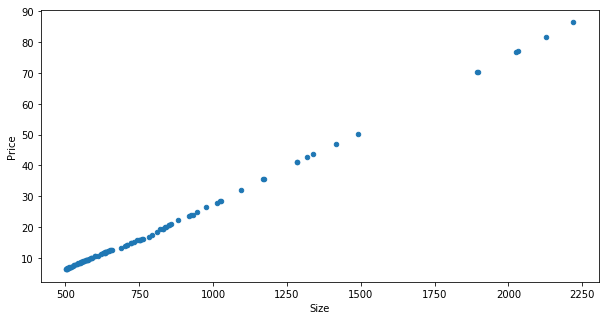

In [82]:
data.plot(kind='scatter', x='Size', y='Price', figsize=(10,5))

In [83]:
data=(data-data.mean())/(data.max()-data.min())
data.head()

,Size,Price
0,-0.182399,-0.169891
1,-0.181840,-0.169891
2,-0.180786,-0.167394
3,-0.180507,-0.167394
4,-0.179878,-0.166145


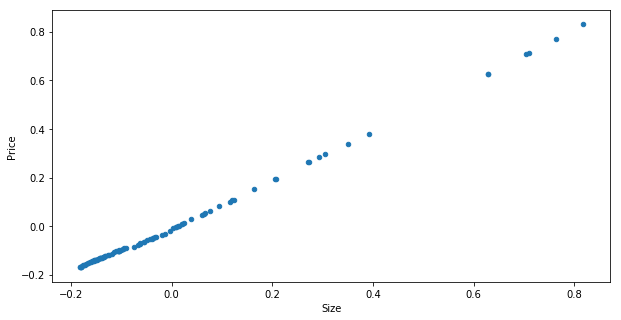

In [84]:
data.plot(kind='scatter', x='Size', y='Price', figsize=(10,5))

In [85]:
data.shape

(97, 2)

In [86]:
data.insert(0,'Ones',1)
data.head()

,Ones,Size,Price
0,1,-0.182399,-0.169891
1,1,-0.181840,-0.169891
2,1,-0.180786,-0.167394
3,1,-0.180507,-0.167394
4,1,-0.179878,-0.166145


In [87]:
cols=data.shape[1]
print (cols)

3


In [88]:
x=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]

In [89]:
x=np.matrix(x)
y=np.matrix(y)
theta=np.matrix(np.array([0,0]))

In [90]:
x.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [91]:
x.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [92]:
def computeError (x,y,theta):
    inner = np.power(((x * theta.T)- y),2)
    
    return np.sum(inner)/(2 * len(x))

In [93]:
computeError(x,y,theta)

0.024346853685025278

In [94]:
Learn_rate=1
iters=100

def gradientDescent(x,y,theta,Learn_rate,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters= int(theta.ravel().shape[1])
    cost=np.zeros(iters)
    
    for i in range(iters):
        error = (x * theta.T) - y
        
        for j in range(parameters):
            term=np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((Learn_rate / len(x)) * np.sum(term))
            
            theta=temp
            cost[i]=computeError(x,y,theta)
            
            
    return theta, cost

In [95]:
g, cost = gradientDescent(x,y,theta,Learn_rate,iters)
print (g,cost)

[[ -1.02473871e-16   9.77709457e-01]] [  2.19673183e-02   1.98208708e-02   1.78846789e-02   1.61381471e-02
   1.45626971e-02   1.31415706e-02   1.18596508e-02   1.07033016e-02
   9.66022291e-03   8.71931915e-03   7.87058178e-03   7.10498263e-03
   6.41437789e-03   5.79142147e-03   5.22948685e-03   4.72259664e-03
   4.26535895e-03   3.85291006e-03   3.48086268e-03   3.14525926e-03
   2.84252994e-03   2.56945453e-03   2.32312827e-03   2.10093094e-03
   1.90049899e-03   1.71970039e-03   1.55661194e-03   1.40949886e-03
   1.27679627e-03   1.15709258e-03   1.04911449e-03   9.51713408e-04
   8.63853270e-04   7.84599488e-04   7.13109024e-04   6.48621422e-04
   5.90450714e-04   5.37978129e-04   4.90645505e-04   4.47949357e-04
   4.09435518e-04   3.74694309e-04   3.43356182e-04   3.15087786e-04
   2.89588427e-04   2.66586861e-04   2.45838419e-04   2.27122393e-04
   2.10239700e-04   1.95010753e-04   1.81273561e-04   1.68881998e-04
   1.57704253e-04   1.47621426e-04   1.38526264e-04   1.30322020e

In [96]:
data_x=data.Size

Text(0.5,1,'Predicted Price vs. Size')

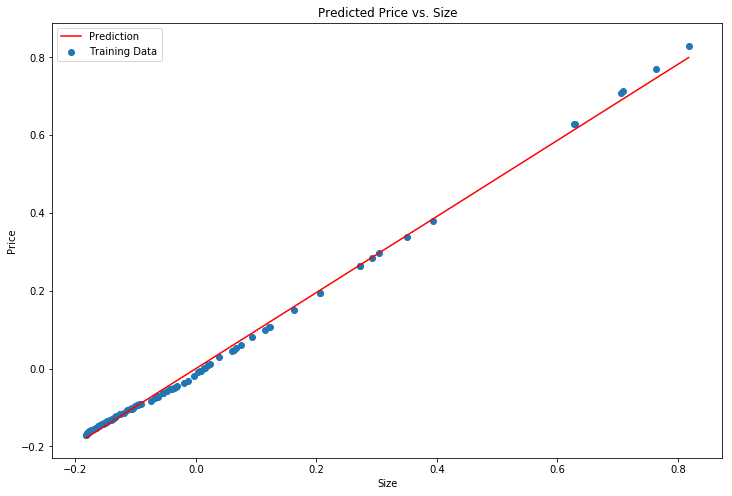

In [97]:
f= g[0,0] + (g[0,1] * data_x)

fig, ax=ply.subplots(figsize=(12,8))
ax.plot(data_x, f,'r', label='Prediction')
ax.scatter(data.Size, data.Price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Predicted Price vs. Size')

Text(0.5,1,'Error vs. Iterations')

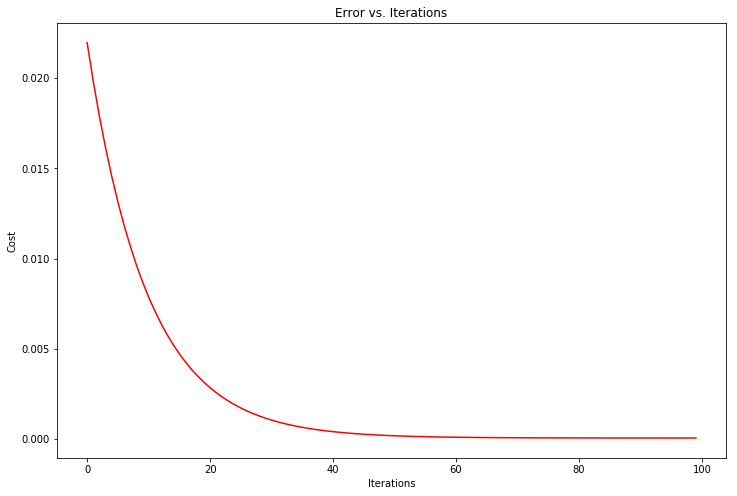

In [98]:
fig, ax= ply.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Iterations')

In [99]:
from sklearn.metrics import r2_score
acc = (r2_score(y,f))
print("accuracy={}%" .format(acc*100))

accuracy=99.77171260606622%


In [100]:
def predict(theta, acc):
    size=float(input("Enter the size of the house:"))
    size=(size - data.Size.mean())/(org_data.Size.max()-org_data.Size.min())
    price = (theta[0,0] + (theta[0,1] * size))
    new_price=(price * (org_data.Price.max()-org_data.Price.min()))+org_data.Price.mean()
    price_at_max_acc=(new_price * (1 / acc))
    price_range=price_at_max_acc - new_price
    
    return new_price, price_range

In [101]:
New_price, price_range = predict(g, acc)
print('Your house would cost: ' + str(New_price) + ' Lakhs '+ '(+ or -)' + str(price_range) + 'Lakhs ')

Enter the size of the house:1000
Your house would cost: 65.5033053991 Lakhs (+ or -)0.149877941282Lakhs 
